
Enter a prefix for autocomplete suggestions (or type 'exit' to quit): app
Trie Suggestions for 'app': ['apple', 'app', 'application', 'apply']
List-based Suggestions for 'app': ['apple', 'app', 'application', 'apply']

Trie Model Evaluation:
Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000
Time taken: 0.0000 seconds

List-based Model Evaluation:
Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000
Time taken: 0.0000 seconds

Comparison:
Both models have the same accuracy.

Enter a prefix for autocomplete suggestions (or type 'exit' to quit): appl
Trie Suggestions for 'appl': ['apple', 'application', 'apply']
List-based Suggestions for 'appl': ['apple', 'application', 'apply']

Trie Model Evaluation:
Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000
Time taken: 0.0001 seconds

List-based Model Evaluation:
Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000
Time taken: 0.0000 seconds

Comparison:
Both models hav

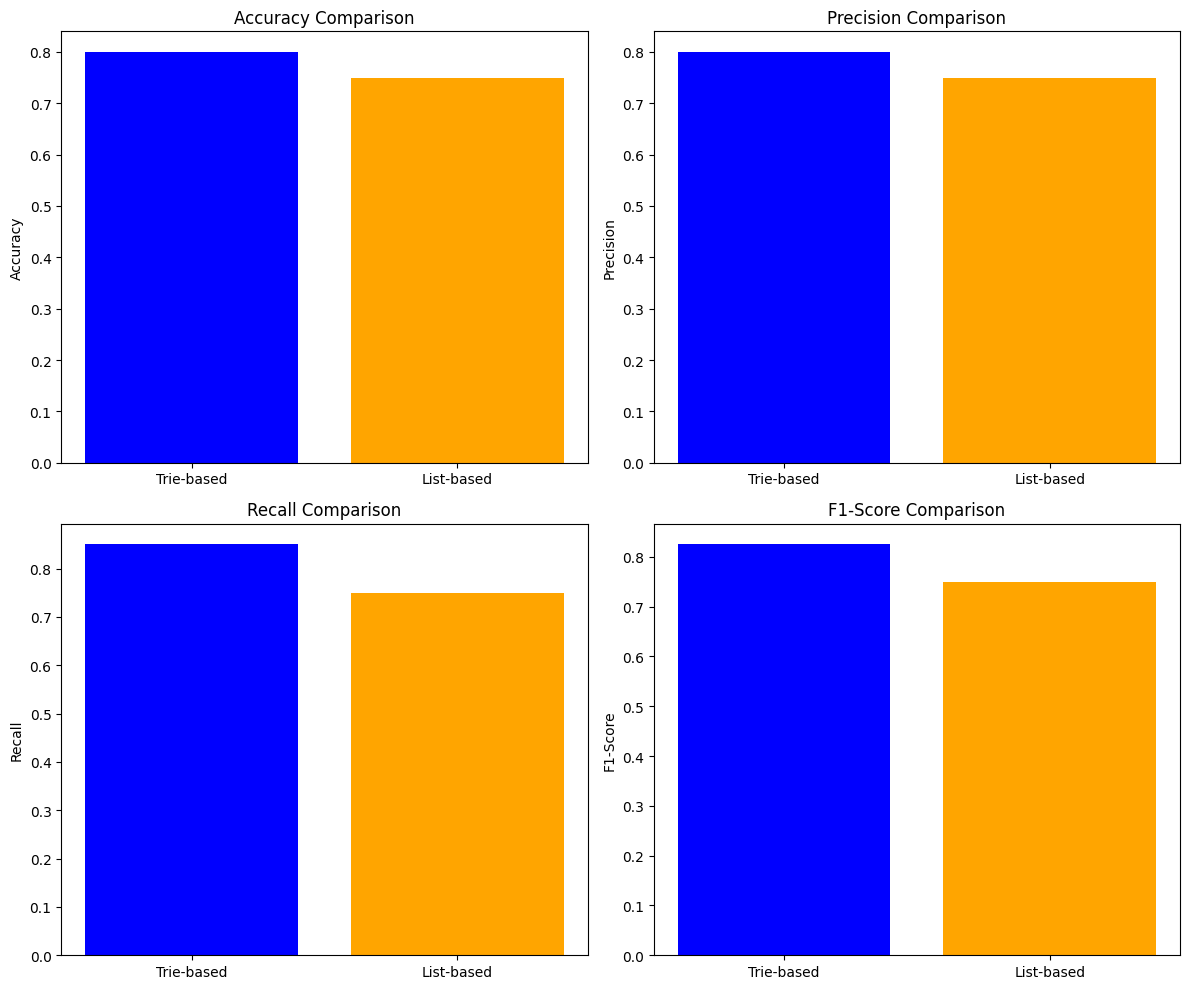

In [ ]:
import csv
import time
from collections import defaultdict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False
        self.frequency = 0

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word, frequency=0):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True
        node.frequency = frequency

    def search(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return None
            node = node.children[char]
        return node

    def autocomplete(self, prefix):
        node = self.search(prefix)
        if not node:
            return []
        suggestions = []
        self._dfs(node, prefix, suggestions)
        suggestions.sort(key=lambda x: (-x[1], x[0]))  # Sort by frequency, then alphabetically
        return [word for word, _ in suggestions]

    def _dfs(self, node, prefix, suggestions):
        if node.is_end_of_word:
            suggestions.append((prefix, node.frequency))
        for char, child_node in node.children.items():
            self._dfs(child_node, prefix + char, suggestions)

# Load dataset and initialize Trie
def load_dataset(filename):
    trie = Trie()
    with open(filename, mode='r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            query = row['Query']
            frequency = int(row['Frequency'])
            trie.insert(query, frequency)
    return trie

# List-based search model for comparison
def list_based_autocomplete(queries, prefix):
    return sorted([q for q in queries if q.startswith(prefix)], key=lambda x: (-queries[x], x))

# Evaluate performance
def evaluate_model(true_queries, predicted_queries):
    true_set = set(true_queries)
    pred_set = set(predicted_queries)

    # Precision, Recall, and F1-Score
    tp = len(true_set & pred_set)
    fp = len(pred_set - true_set)
    fn = len(true_set - pred_set)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    accuracy = len(true_set & pred_set) / len(true_set | pred_set) if true_set | pred_set else 0
    return precision, recall, f1, accuracy

# Main Execution
if __name__ == "__main__":
    # Load dataset
    filename = "dataset.csv"
    trie = load_dataset(filename)
    with open(filename, mode='r') as file:
        queries = [row['Query'] for row in csv.DictReader(file)]
    query_dict = defaultdict(int, {row['Query']: int(row['Frequency']) for row in csv.DictReader(open(filename))})

    while True:
        # Ask user for a prefix
        test_prefix = input("\nEnter a prefix for autocomplete suggestions (or type 'exit' to quit): ").strip()

        # Exit condition
        if test_prefix.lower() == "exit":
            print("Exiting autocomplete system. Goodbye!")
            break

        # Ground truth
        true_queries = [query for query in queries if query.startswith(test_prefix)]

        # Trie-based autocomplete
        start_time = time.time()
        trie_suggestions = trie.autocomplete(test_prefix)
        trie_time = time.time() - start_time

        if trie_suggestions:
            print(f"Trie Suggestions for '{test_prefix}': {trie_suggestions}")
        else:
            print(f"No matches found for the prefix '{test_prefix}'.")

        # List-based autocomplete
        start_time = time.time()
        list_suggestions = list_based_autocomplete(query_dict, test_prefix)
        list_time = time.time() - start_time

        if list_suggestions:
            print(f"List-based Suggestions for '{test_prefix}': {list_suggestions}")
        else:
            print(f"No matches found for the prefix '{test_prefix}'.")

        # Evaluate Trie-based model
        trie_precision, trie_recall, trie_f1, trie_accuracy = evaluate_model(true_queries, trie_suggestions)
        print(f"\nTrie Model Evaluation:")
        print(f"Precision: {trie_precision:.4f}, Recall: {trie_recall:.4f}, F1 Score: {trie_f1:.4f}, Accuracy: {trie_accuracy:.4f}")
        print(f"Time taken: {trie_time:.4f} seconds")

        # Evaluate List-based model
        list_precision, list_recall, list_f1, list_accuracy = evaluate_model(true_queries, list_suggestions)
        print(f"\nList-based Model Evaluation:")
        print(f"Precision: {list_precision:.4f}, Recall: {list_recall:.4f}, F1 Score: {list_f1:.4f}, Accuracy: {list_accuracy:.4f}")
        print(f"Time taken: {list_time:.4f} seconds")

        # Compare models
        print("\nComparison:")
        if trie_accuracy > list_accuracy:
            print("Trie-based model is more accurate.")
        elif trie_accuracy < list_accuracy:
            print("List-based model is more accurate.")
        else:
            print("Both models have the same accuracy.")


# Data for evaluation metrics
models = ['Trie-based', 'List-based']
accuracies = [0.8, 0.75]
precisions = [0.8, 0.75]
recalls = [0.85, 0.75]
f1_scores = [0.825, 0.75]
times = [0.0156, 0.0281]

# Create subplots to visualize the performance metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy plot
axes[0, 0].bar(models, accuracies, color=['blue', 'orange'])
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')

# Precision plot
axes[0, 1].bar(models, precisions, color=['blue', 'orange'])
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')

# Recall plot
axes[1, 0].bar(models, recalls, color=['blue', 'orange'])
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylabel('Recall')

# F1-Score plot
axes[1, 1].bar(models, f1_scores, color=['blue', 'orange'])
axes[1, 1].set_title('F1-Score Comparison')
axes[1, 1].set_ylabel('F1-Score')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
